## Problem Statement:
* Company wants to automate the loan eligibility process based on customer details provided while filling online application form. The details filled by the customer are Gender, Marital Status, Education, Number of Dependents, Income of self and co applicant, Required Loan Amount, Required Loan Term, Credit History and others.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns',None)

import scipy.stats as stats

from sklearn.model_selection import train_test_split
 

import warnings
warnings.filterwarnings('ignore')


In [2]:
from sklearn.tree import DecisionTreeClassifier,plot_tree
dtc = DecisionTreeClassifier(criterion='entropy')

In [3]:
data = pd.read_csv('loan_data.csv')

In [4]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y


## Data Preprocessing 


### Check the number of rows and columns

In [5]:
print('Rows: ',data.shape[0],'\nColumns:',data.shape[1])

Rows:  381 
Columns: 13


### Check datatype of each variable

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381 entries, 0 to 380
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            381 non-null    object 
 1   Gender             376 non-null    object 
 2   Married            381 non-null    object 
 3   Dependents         373 non-null    object 
 4   Education          381 non-null    object 
 5   Self_Employed      360 non-null    object 
 6   ApplicantIncome    381 non-null    int64  
 7   CoapplicantIncome  381 non-null    float64
 8   LoanAmount         381 non-null    float64
 9   Loan_Amount_Term   370 non-null    float64
 10  Credit_History     351 non-null    float64
 11  Property_Area      381 non-null    object 
 12  Loan_Status        381 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 38.8+ KB


## Univariate Analysis : Numeric Columns

### Define numeric and categorical variables

In [7]:
nums = data.select_dtypes(include=np.number).columns

In [8]:
nums

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History'],
      dtype='object')

In [9]:
cats = data.select_dtypes(exclude=np.number).columns

In [10]:
cats

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [11]:
cats = ['Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Property_Area', 'Loan_Status']

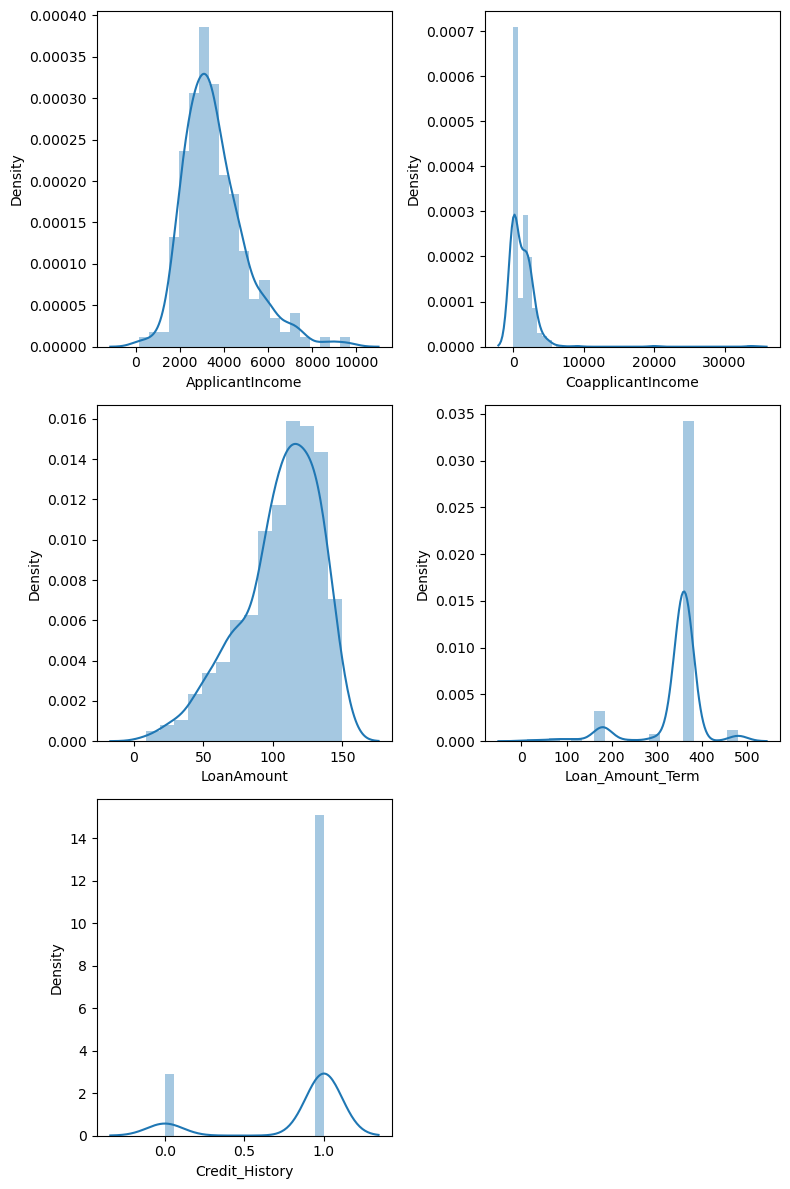

In [12]:
plt.figure(figsize=(8,12))
t=1
for i in nums:
    plt.subplot(3,2,t)
    sns.distplot(data[i])
    t+=1
plt.tight_layout()
plt.show()

### Interpretations :
* ApplicantIncome:
The distribution is right-skewed, meaning most applicants have lower incomes, but there are a few with significantly higher incomes.
The bulk of the data is concentrated between 0 and around 10,000.

* CoapplicantIncome:
This distribution is also right-skewed, with most coapplicants having low to moderate incomes.
There are some high-income coapplicants, but they are less frequent.

* LoanAmount:
The loan amounts are left-skewed , with most loans being on the higher side, but a few being on the lower side.
Most loan amounts are between 0 and around 200.

* Loan_Amount_Term:
This distribution shows the terms (in months) of the loans. There are peaks around common loan term values (e.g., 360, 180), indicating many loans have these standard terms.
The density decreases for very high and very low terms.

* Credit_History:
This plot is quite distinct, showing a clear binary distribution (0 and 1). This indicates that credit history is likely a categorical variable where 0 may represent no/poor credit history and 1 may represent good credit history.
Most applicants seem to have a good credit history (value 1), as shown by the higher density at 1.

## Univariate Analysis : Categorical Columns

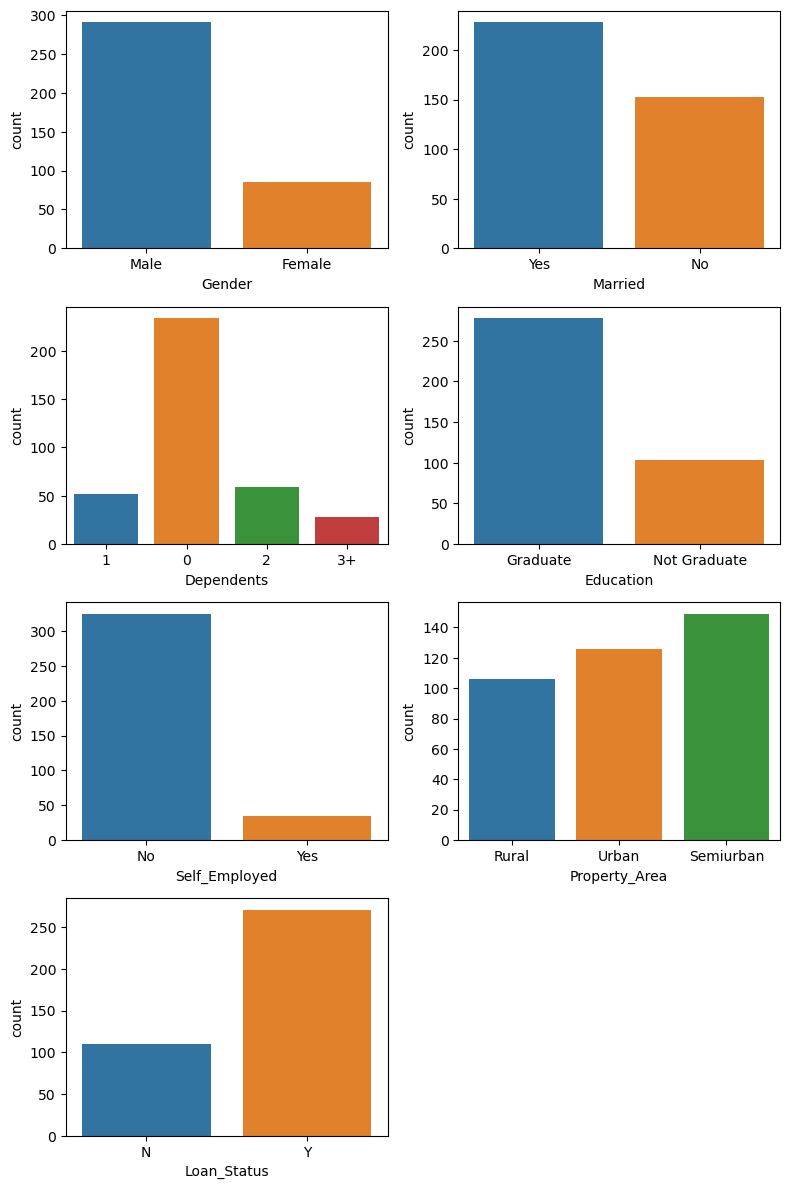

In [13]:
plt.figure(figsize=(8,12))
t=1
for i in cats:
    plt.subplot(4,2,t)
    sns.countplot(data=data,x=i)
    t+=1
plt.tight_layout()
plt.show()

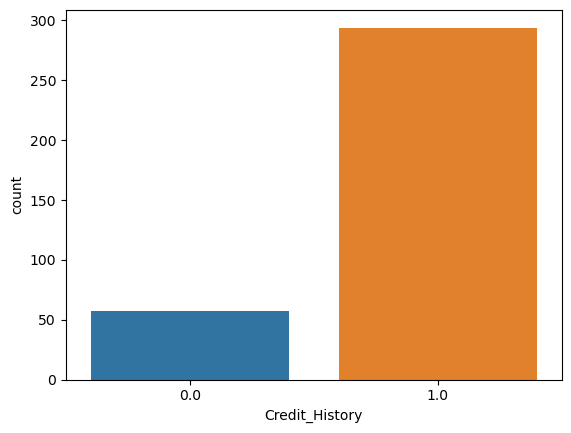

In [14]:
sns.countplot(data=data,x='Credit_History')
plt.show()

## Bivariate Analysis : Number vs Category 

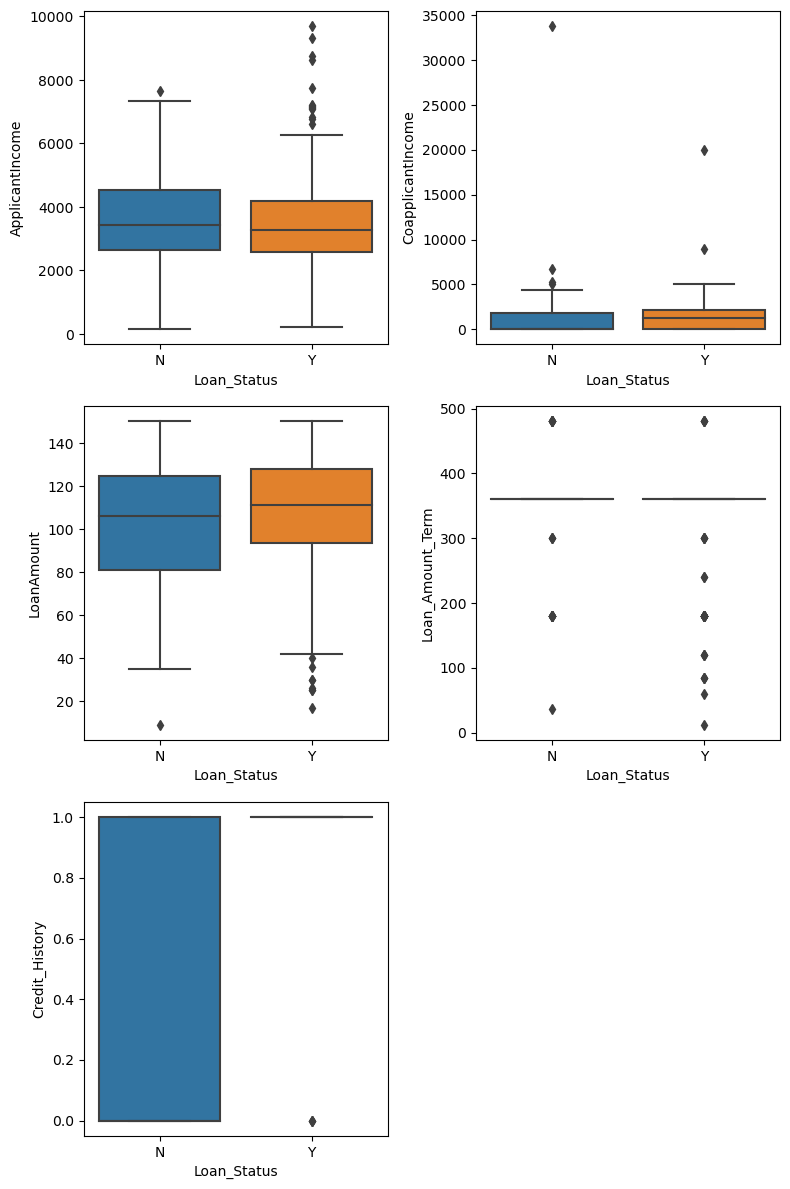

In [15]:
plt.figure(figsize=(8,12))
t=1

for i in  nums:
    plt.subplot(3,2,t)
    sns.boxplot(data=data,x=data['Loan_Status'],y=i)
    t+=1
plt.tight_layout()
plt.show()

In [16]:
for i in cats:
    if i!= 'Loan_Status':
        loan_crosstab = pd.crosstab(data[i], data['Loan_Status'])
        print()
        print()
        print(loan_crosstab)





Loan_Status   N    Y
Gender              
Female       26   59
Male         80  211


Loan_Status   N    Y
Married             
No           52  101
Yes          58  170


Loan_Status   N    Y
Dependents          
0            66  168
1            17   35
2            15   44
3+            8   20


Loan_Status    N    Y
Education            
Graduate      76  202
Not Graduate  34   69


Loan_Status     N    Y
Self_Employed         
No             95  230
Yes            11   24


Loan_Status     N    Y
Property_Area         
Rural          41   65
Semiurban      30  119
Urban          39   87


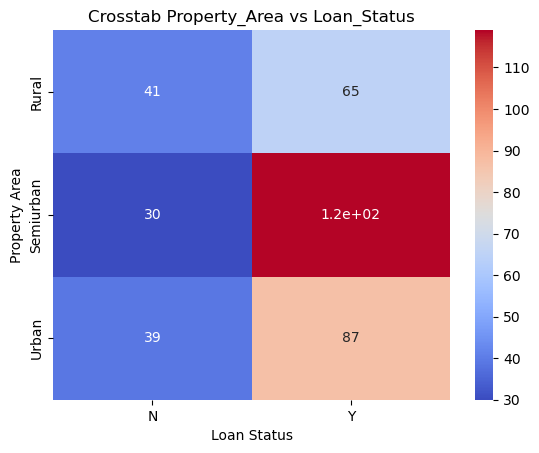

In [17]:
# Visualize crosstab as a heatmap
sns.heatmap(loan_crosstab, annot=True, cmap='coolwarm')
plt.title('Crosstab Property_Area vs Loan_Status')
plt.xlabel('Loan Status')
plt.ylabel('Property Area')
plt.show()

## Missing Values 

In [18]:
data.isnull().sum().sort_values(ascending = False)

Credit_History       30
Self_Employed        21
Loan_Amount_Term     11
Dependents            8
Gender                5
Loan_ID               0
Married               0
Education             0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Property_Area         0
Loan_Status           0
dtype: int64

In [19]:
## Credit history 
data['Credit_History'].value_counts()

Credit_History
1.0    294
0.0     57
Name: count, dtype: int64

In [20]:
## lets impute all the missing values with central value
data['Credit_History'].fillna(1,inplace=True)

In [21]:
##Self Employed 
data['Self_Employed'].value_counts()

Self_Employed
No     325
Yes     35
Name: count, dtype: int64

In [22]:
data['Self_Employed'].fillna('No',inplace=True)

In [23]:
##Loan Amount Term 
data['Loan_Amount_Term'].value_counts()

Loan_Amount_Term
360.0    312
180.0     29
480.0     11
300.0      7
120.0      3
84.0       3
240.0      2
60.0       1
12.0       1
36.0       1
Name: count, dtype: int64

In [24]:
data['Loan_Amount_Term'].fillna(360,inplace=True)

In [25]:
# Dependents :
data['Dependents'].value_counts()
# 3+ is object hence will change it to number 

Dependents
0     234
2      59
1      52
3+     28
Name: count, dtype: int64

In [26]:
data['Dependents'].fillna('0',inplace=True)

In [27]:
##Gender 
data['Gender'].value_counts()

Gender
Male      291
Female     85
Name: count, dtype: int64

In [28]:
data['Gender'].fillna('Male',inplace=True)

In [29]:
data.isnull().sum()
#All missing values have been treated 

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

## Encoding:

In [30]:
## Dropping loan_id -- Irrelevant column
del data['Loan_ID']

In [31]:
#Dependent 
data['Dependents'].replace('3+','3',inplace=True)

In [32]:
data['Dependents'] = data['Dependents'].astype(int)

In [33]:
# rest of the columns can be dummy encoded 
data = pd.get_dummies(data,drop_first=True,dtype=int)

In [34]:
data.head()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y
0,1,4583,1508.0,128.0,360.0,1.0,1,1,0,0,0,0,0
1,0,3000,0.0,66.0,360.0,1.0,1,1,0,1,0,1,1
2,0,2583,2358.0,120.0,360.0,1.0,1,1,1,0,0,1,1
3,0,6000,0.0,141.0,360.0,1.0,1,0,0,0,0,1,1
4,0,2333,1516.0,95.0,360.0,1.0,1,1,1,0,0,1,1


In [35]:
data.shape

(381, 13)

## Splitting the data

In [36]:
from sklearn.metrics import confusion_matrix,classification_report,cohen_kappa_score,roc_curve,roc_auc_score
from sklearn.model_selection import train_test_split

In [37]:
y = data['Loan_Status_Y']
x = data.drop(columns='Loan_Status_Y')

In [38]:
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.75,
                                                 stratify=y,random_state=2)

In [39]:
def model_validation(model,xtrain,ytrain,xtest,ytest):
    global m
    m = model
    m.fit(xtrain,ytrain)
    pred = m.predict(xtest)
    prob = m.predict_proba(xtest)[:,1]
    
    print('Confusion Matrix:\n',confusion_matrix(ytest,pred))
    print('Classification report\n',classification_report(ytest,pred))
    print('Cohen Kappa',cohen_kappa_score(ytest,pred))
    
    fpr,tpr,thresh = roc_curve(ytest,prob)
    plt.plot(fpr,tpr,color='green')
    plt.plot([0,1],[0,1],color='red',ls='--')
    plt.title(f'AUC {roc_auc_score(ytest,prob)}')

Confusion Matrix:
 [[15 13]
 [ 4 64]]
Classification report
               precision    recall  f1-score   support

           0       0.79      0.54      0.64        28
           1       0.83      0.94      0.88        68

    accuracy                           0.82        96
   macro avg       0.81      0.74      0.76        96
weighted avg       0.82      0.82      0.81        96

Cohen Kappa 0.5266821345707656


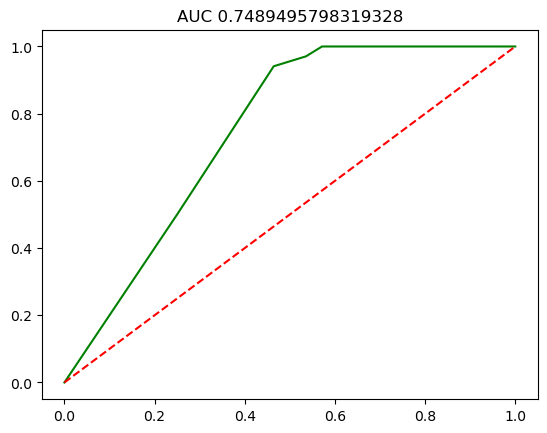

In [40]:
model_validation(DecisionTreeClassifier(max_depth=3),x_train,y_train,
                x_test,y_test)

Confusion Matrix:
 [[17 11]
 [27 41]]
Classification report
               precision    recall  f1-score   support

           0       0.39      0.61      0.47        28
           1       0.79      0.60      0.68        68

    accuracy                           0.60        96
   macro avg       0.59      0.61      0.58        96
weighted avg       0.67      0.60      0.62        96

Cohen Kappa 0.17985611510791366


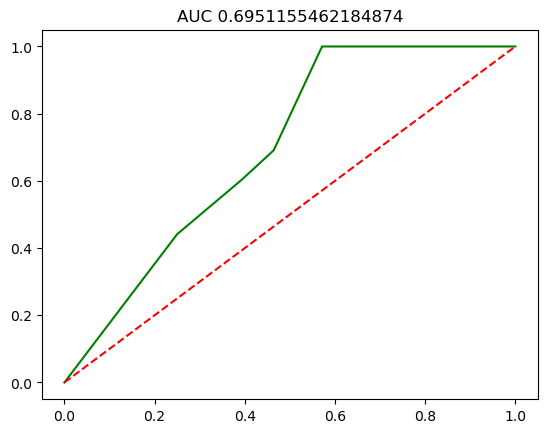

In [41]:
## Applying Class_weight 
model_validation(DecisionTreeClassifier(max_depth=3,class_weight={0:3,1:1}),x_train,y_train,
                x_test,y_test)                          #will give more preference to 0

## Ensemble Learning :

In [42]:
## Random Forest 
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier
from sklearn.naive_bayes import GaussianNB


Confusion Matrix:
 [[10 18]
 [ 0 68]]
Classification report
               precision    recall  f1-score   support

           0       1.00      0.36      0.53        28
           1       0.79      1.00      0.88        68

    accuracy                           0.81        96
   macro avg       0.90      0.68      0.70        96
weighted avg       0.85      0.81      0.78        96

Cohen Kappa 0.44041450777202074


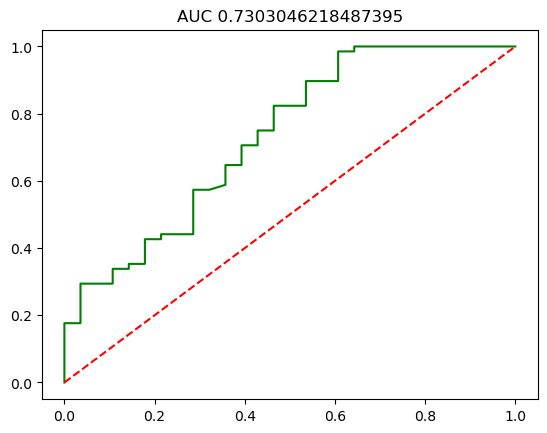

In [43]:
model_validation(RandomForestClassifier(n_estimators=10,max_depth=3),x_train,y_train,
                x_test,y_test)

Confusion Matrix:
 [[12 16]
 [ 0 68]]
Classification report
               precision    recall  f1-score   support

           0       1.00      0.43      0.60        28
           1       0.81      1.00      0.89        68

    accuracy                           0.83        96
   macro avg       0.90      0.71      0.75        96
weighted avg       0.87      0.83      0.81        96

Cohen Kappa 0.5151515151515151


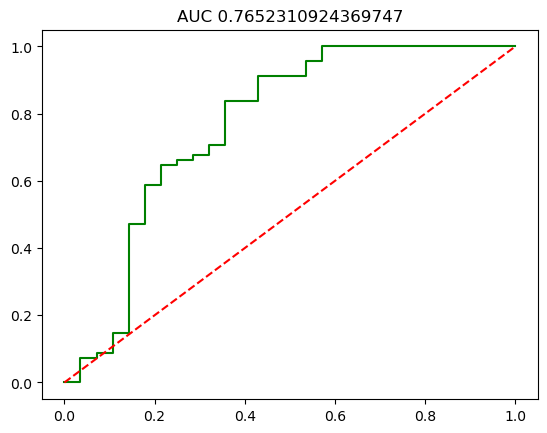

In [44]:
# Bagging (Naive Bayes)
model_validation(BaggingClassifier(estimator=GaussianNB(),n_estimators=50,max_samples=x_train.shape[0]),
                 x_train,y_train,x_test,y_test)

In [45]:
m.estimators_samples_

[array([278, 176,  33,  39, 253, 137, 204, 133, 143, 220, 160, 112, 173,
        185,  63, 122,  72, 259,  49, 122, 152, 233, 225, 152, 197, 179,
        122, 257, 233, 100, 171, 105, 271, 210,   5, 161, 249, 244, 176,
        157, 255, 226, 177, 209, 113, 275, 172, 175,  79,  67, 128,  97,
        202, 135,  62, 160, 116, 153,  70, 258, 203,  35, 276, 207,  41,
        283,   2, 173, 143, 234, 197, 201,  46,  64, 193, 265, 173, 146,
         54, 103, 109, 260, 112, 128, 233, 207, 253, 176, 164, 191, 187,
         52, 175, 181,  84, 281,  53, 236, 205,   0, 232,  92,  12,  18,
         44, 147,  53,  71, 242, 138, 123, 179,  27, 261,  52, 236,  70,
         63, 274,  68,  97,  40,  86,  43, 212, 183,  13, 238, 180, 214,
        269,  60, 187, 180, 121, 244,  54,  74,  18, 271, 258, 272,  23,
        269, 187, 143,  45, 253,  86, 234, 198, 242,   8, 184, 264,  55,
         27, 137, 122,  86, 229, 248,  40, 269, 149, 284,  60, 283,  53,
         21,  17, 164, 188, 237, 223,  24, 144, 254

In [46]:
m.estimators_features_

[array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 array([ 0,  1

## Adaptive Boosting (AdaBoost)

In [47]:
from sklearn.ensemble import AdaBoostClassifier

In [48]:
ada = AdaBoostClassifier(n_estimators=100,learning_rate=1)

Confusion Matrix:
 [[14 14]
 [ 8 60]]
Classification report
               precision    recall  f1-score   support

           0       0.64      0.50      0.56        28
           1       0.81      0.88      0.85        68

    accuracy                           0.77        96
   macro avg       0.72      0.69      0.70        96
weighted avg       0.76      0.77      0.76        96

Cohen Kappa 0.4080717488789237


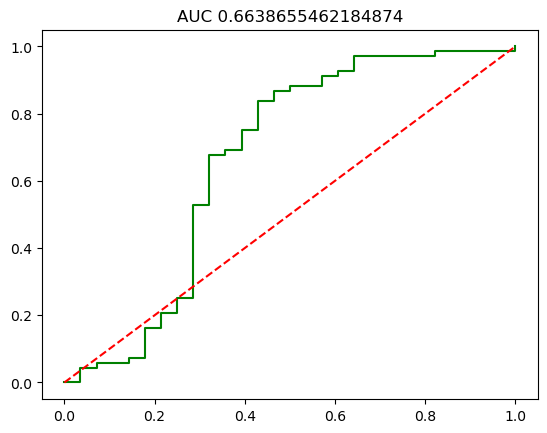

In [49]:
model_validation(ada,x_train,y_train,x_test,y_test)

## Gradient Boosting

In [50]:
from sklearn.ensemble import GradientBoostingClassifier

In [51]:
gbc = GradientBoostingClassifier(n_estimators=200,learning_rate=0.05)


Confusion Matrix:
 [[14 14]
 [ 5 63]]
Classification report
               precision    recall  f1-score   support

           0       0.74      0.50      0.60        28
           1       0.82      0.93      0.87        68

    accuracy                           0.80        96
   macro avg       0.78      0.71      0.73        96
weighted avg       0.79      0.80      0.79        96

Cohen Kappa 0.4709976798143851


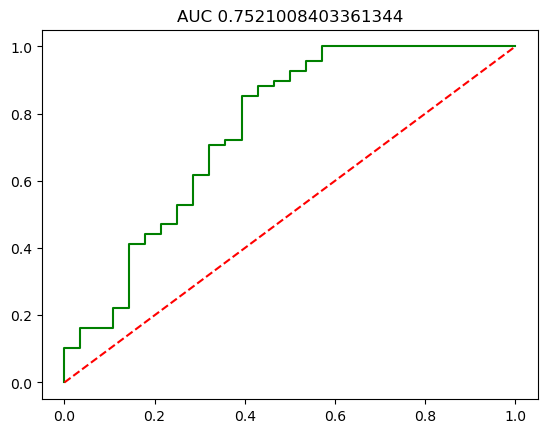

In [52]:
model_validation(gbc,x_train,y_train,x_test,y_test)

## Hyperparameter Tuning to Find best parameters of GradientBoosting Model

In [53]:
## Lets use GridSearchCV to tune the model and to find the best parameters to build the model 1
from sklearn.model_selection import GridSearchCV

In [54]:
params = {'n_estimators':[50,70,100,120,150,180,200],
          'learning_rate':[1,0.5,0.1,0.05],
          'max_depth':[4,6,8,10,12]}

In [55]:
gscv = GridSearchCV(estimator = GradientBoostingClassifier(),
                    param_grid=params,cv=3,scoring ='f1_macro',verbose=3)

In [56]:
gscv.fit(x_train,y_train)

Fitting 3 folds for each of 140 candidates, totalling 420 fits
[CV 1/3] END learning_rate=1, max_depth=4, n_estimators=50;, score=0.674 total time=   0.0s
[CV 2/3] END learning_rate=1, max_depth=4, n_estimators=50;, score=0.799 total time=   0.0s
[CV 3/3] END learning_rate=1, max_depth=4, n_estimators=50;, score=0.721 total time=   0.0s
[CV 1/3] END learning_rate=1, max_depth=4, n_estimators=70;, score=0.684 total time=   0.0s
[CV 2/3] END learning_rate=1, max_depth=4, n_estimators=70;, score=0.783 total time=   0.0s
[CV 3/3] END learning_rate=1, max_depth=4, n_estimators=70;, score=0.715 total time=   0.0s
[CV 1/3] END learning_rate=1, max_depth=4, n_estimators=100;, score=0.693 total time=   0.0s
[CV 2/3] END learning_rate=1, max_depth=4, n_estimators=100;, score=0.799 total time=   0.0s
[CV 3/3] END learning_rate=1, max_depth=4, n_estimators=100;, score=0.709 total time=   0.0s
[CV 1/3] END learning_rate=1, max_depth=4, n_estimators=120;, score=0.693 total time=   0.0s
[CV 2/3] END 

[CV 3/3] END learning_rate=1, max_depth=12, n_estimators=70;, score=0.737 total time=   0.0s
[CV 1/3] END learning_rate=1, max_depth=12, n_estimators=100;, score=0.701 total time=   0.0s
[CV 2/3] END learning_rate=1, max_depth=12, n_estimators=100;, score=0.696 total time=   0.0s
[CV 3/3] END learning_rate=1, max_depth=12, n_estimators=100;, score=0.737 total time=   0.0s
[CV 1/3] END learning_rate=1, max_depth=12, n_estimators=120;, score=0.735 total time=   0.0s
[CV 2/3] END learning_rate=1, max_depth=12, n_estimators=120;, score=0.706 total time=   0.0s
[CV 3/3] END learning_rate=1, max_depth=12, n_estimators=120;, score=0.715 total time=   0.0s
[CV 1/3] END learning_rate=1, max_depth=12, n_estimators=150;, score=0.684 total time=   0.0s
[CV 2/3] END learning_rate=1, max_depth=12, n_estimators=150;, score=0.715 total time=   0.0s
[CV 3/3] END learning_rate=1, max_depth=12, n_estimators=150;, score=0.721 total time=   0.0s
[CV 1/3] END learning_rate=1, max_depth=12, n_estimators=180;

[CV 1/3] END learning_rate=0.5, max_depth=10, n_estimators=120;, score=0.719 total time=   0.0s
[CV 2/3] END learning_rate=0.5, max_depth=10, n_estimators=120;, score=0.706 total time=   0.0s
[CV 3/3] END learning_rate=0.5, max_depth=10, n_estimators=120;, score=0.713 total time=   0.0s
[CV 1/3] END learning_rate=0.5, max_depth=10, n_estimators=150;, score=0.684 total time=   0.0s
[CV 2/3] END learning_rate=0.5, max_depth=10, n_estimators=150;, score=0.706 total time=   0.0s
[CV 3/3] END learning_rate=0.5, max_depth=10, n_estimators=150;, score=0.722 total time=   0.1s
[CV 1/3] END learning_rate=0.5, max_depth=10, n_estimators=180;, score=0.719 total time=   0.0s
[CV 2/3] END learning_rate=0.5, max_depth=10, n_estimators=180;, score=0.677 total time=   0.0s
[CV 3/3] END learning_rate=0.5, max_depth=10, n_estimators=180;, score=0.722 total time=   0.1s
[CV 1/3] END learning_rate=0.5, max_depth=10, n_estimators=200;, score=0.629 total time=   0.0s
[CV 2/3] END learning_rate=0.5, max_dept

[CV 1/3] END learning_rate=0.1, max_depth=8, n_estimators=150;, score=0.711 total time=   0.3s
[CV 2/3] END learning_rate=0.1, max_depth=8, n_estimators=150;, score=0.760 total time=   0.3s
[CV 3/3] END learning_rate=0.1, max_depth=8, n_estimators=150;, score=0.751 total time=   0.3s
[CV 1/3] END learning_rate=0.1, max_depth=8, n_estimators=180;, score=0.692 total time=   0.4s
[CV 2/3] END learning_rate=0.1, max_depth=8, n_estimators=180;, score=0.760 total time=   0.4s
[CV 3/3] END learning_rate=0.1, max_depth=8, n_estimators=180;, score=0.767 total time=   0.4s
[CV 1/3] END learning_rate=0.1, max_depth=8, n_estimators=200;, score=0.674 total time=   0.5s
[CV 2/3] END learning_rate=0.1, max_depth=8, n_estimators=200;, score=0.760 total time=   0.5s
[CV 3/3] END learning_rate=0.1, max_depth=8, n_estimators=200;, score=0.767 total time=   0.4s
[CV 1/3] END learning_rate=0.1, max_depth=10, n_estimators=50;, score=0.701 total time=   0.0s
[CV 2/3] END learning_rate=0.1, max_depth=10, n_es

[CV 3/3] END learning_rate=0.05, max_depth=6, n_estimators=150;, score=0.745 total time=   0.1s
[CV 1/3] END learning_rate=0.05, max_depth=6, n_estimators=180;, score=0.713 total time=   0.2s
[CV 2/3] END learning_rate=0.05, max_depth=6, n_estimators=180;, score=0.771 total time=   0.2s
[CV 3/3] END learning_rate=0.05, max_depth=6, n_estimators=180;, score=0.762 total time=   0.2s
[CV 1/3] END learning_rate=0.05, max_depth=6, n_estimators=200;, score=0.713 total time=   0.2s
[CV 2/3] END learning_rate=0.05, max_depth=6, n_estimators=200;, score=0.760 total time=   0.2s
[CV 3/3] END learning_rate=0.05, max_depth=6, n_estimators=200;, score=0.745 total time=   0.2s
[CV 1/3] END learning_rate=0.05, max_depth=8, n_estimators=50;, score=0.713 total time=   0.0s
[CV 2/3] END learning_rate=0.05, max_depth=8, n_estimators=50;, score=0.687 total time=   0.0s
[CV 3/3] END learning_rate=0.05, max_depth=8, n_estimators=50;, score=0.712 total time=   0.0s
[CV 1/3] END learning_rate=0.05, max_depth=

GridSearchCV(cv=3, estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [1, 0.5, 0.1, 0.05],
                         'max_depth': [4, 6, 8, 10, 12],
                         'n_estimators': [50, 70, 100, 120, 150, 180, 200]},
             scoring='f1_macro', verbose=3)

### Best Parameters :

In [57]:
gscv.best_params_

{'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 200}

In [58]:
gscv.best_score_

0.7666586921717412

### Building Final model using the Best Parameters 

Confusion Matrix:
 [[13 15]
 [ 7 61]]
Classification report
               precision    recall  f1-score   support

           0       0.65      0.46      0.54        28
           1       0.80      0.90      0.85        68

    accuracy                           0.77        96
   macro avg       0.73      0.68      0.69        96
weighted avg       0.76      0.77      0.76        96

Cohen Kappa 0.3944954128440368


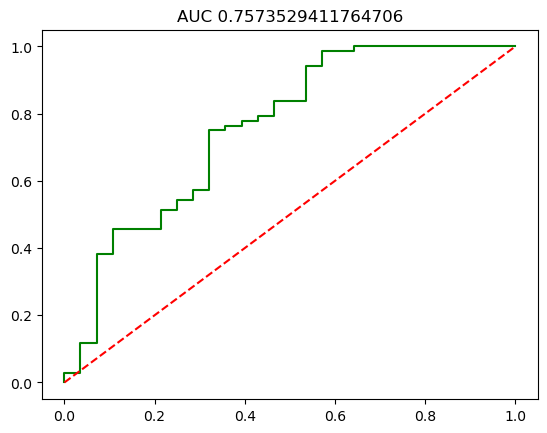

In [59]:
model_validation(GradientBoostingClassifier(**gscv.best_params_),
                x_train,y_train,x_test,y_test)

## XGBoost 

In [60]:
from xgboost import XGBClassifier

In [61]:
xgb = XGBClassifier(n_estimators = 50,learning_rate =0.01,gamma=2)

Confusion Matrix:
 [[12 16]
 [ 0 68]]
Classification report
               precision    recall  f1-score   support

           0       1.00      0.43      0.60        28
           1       0.81      1.00      0.89        68

    accuracy                           0.83        96
   macro avg       0.90      0.71      0.75        96
weighted avg       0.87      0.83      0.81        96

Cohen Kappa 0.5151515151515151


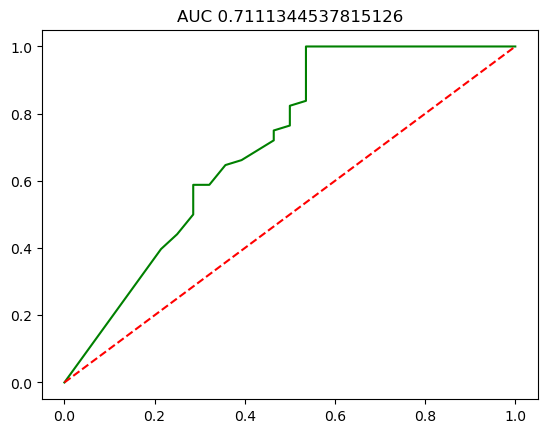

In [62]:
model_validation(xgb,x_train,y_train,x_test,y_test)
#getting same results as naive bayes

In [63]:
prob_xgb=xgb.predict_proba(x_test)[:,1]
prob_gbc=gbc.predict_proba(x_test)[:,1]
prob_ada=ada.predict_proba(x_test)[:,1]




In [64]:
fpr_x,tpr_x,_ = roc_curve(y_test,prob_xgb)
fpr_g,tpr_g,_ = roc_curve(y_test,prob_gbc)
fpr_a,tpr_a,_ = roc_curve(y_test,prob_ada)

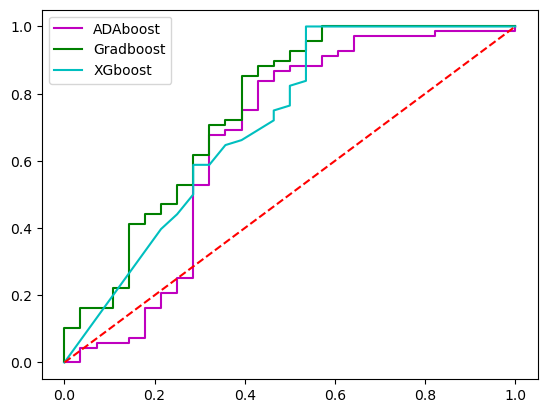

In [65]:
plt.plot(fpr_a,tpr_a,color='m',label='ADAboost')
plt.plot(fpr_g,tpr_g,color='green',label='Gradboost')
plt.plot(fpr_x,tpr_x,color='c',label='XGboost')
plt.plot([0,1],[0,1],color='red',ls='--')
        #x-axis y-axis 
plt.legend()
plt.show()
